In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# 한글 폰트 설정
!pip install koreanize-matplotlib

import koreanize_matplotlib

In [2]:
# 화재발생 파일 업로드
fire = pd.read_csv('fire_1.csv',encoding='EUC-KR',low_memory=False)
fire.head()

,화재발생년원일,시도,시군구,화재유형,발화요인대분류,발화요인소분류,인명피해(명)소계,사망,부상,재산피해소계,부동산,동산,장소대분류,장소중분류,장소소분류
0,2019-01-01 00:03:00,강원특별자치도,삼척시,기타(쓰레기 화재등),부주의,폭죽놀이,1.0,0.0,1.0,0.0,NaN,NaN,기타,야외,기타야외
1,2019-01-01 00:06:00,경기도,평택시,"건축,구조물",미상,미상,0.0,0.0,0.0,14900.0,12973.0,1927.0,주거,단독주택,단독주택
2,2019-01-01 00:40:00,서울특별시,성북구,"자동차,철도차량",미상,미상,0.0,0.0,0.0,3642.0,0.0,3642.0,"자동차,철도차량",자동차,승용자동차
3,2019-01-01 00:52:00,경기도,이천시,기타(쓰레기 화재등),화학적 요인,자연발화,0.0,0.0,0.0,1848.0,0.0,1848.0,기타,야외,야적장
4,2019-01-01 01:06:00,부산광역시,부산진구,"건축,구조물",전기적 요인,절연열화에 의한 단락,0.0,0.0,0.0,45.0,0.0,45.0,기타서비스,기타건축물,기타 건축물


In [3]:
fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029370 entries, 0 to 1029369
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   화재발생년원일    193999 non-null  object 
 1   시도         193999 non-null  object 
 2   시군구        193999 non-null  object 
 3   화재유형       193999 non-null  object 
 4   발화요인대분류    193999 non-null  object 
 5   발화요인소분류    193999 non-null  object 
 6   인명피해(명)소계  193999 non-null  float64
 7   사망         193999 non-null  float64
 8   부상         193999 non-null  float64
 9   재산피해소계     193999 non-null  float64
 10  부동산        178544 non-null  float64
 11  동산         178544 non-null  float64
 12  장소대분류      193999 non-null  object 
 13  장소중분류      193999 non-null  object 
 14  장소소분류      193999 non-null  object 
dtypes: float64(6), object(9)
memory usage: 117.8+ MB


In [4]:
# 불필요한 columns 삭제
fire = fire.drop(columns=['발화요인소분류', '장소중분류', '장소소분류'], axis=1, errors='ignore' )
fire.head()

,화재발생년원일,시도,시군구,화재유형,발화요인대분류,인명피해(명)소계,사망,부상,재산피해소계,부동산,동산,장소대분류
0,2019-01-01 00:03:00,강원특별자치도,삼척시,기타(쓰레기 화재등),부주의,1.0,0.0,1.0,0.0,NaN,NaN,기타
1,2019-01-01 00:06:00,경기도,평택시,"건축,구조물",미상,0.0,0.0,0.0,14900.0,12973.0,1927.0,주거
2,2019-01-01 00:40:00,서울특별시,성북구,"자동차,철도차량",미상,0.0,0.0,0.0,3642.0,0.0,3642.0,"자동차,철도차량"
3,2019-01-01 00:52:00,경기도,이천시,기타(쓰레기 화재등),화학적 요인,0.0,0.0,0.0,1848.0,0.0,1848.0,기타
4,2019-01-01 01:06:00,부산광역시,부산진구,"건축,구조물",전기적 요인,0.0,0.0,0.0,45.0,0.0,45.0,기타서비스


In [5]:
# 이름 재설정
fire.rename(columns={'발화요인대분류':'발화요인','인명피해(명)소계':'인명피해',
                     '재산피해소계' : '재산피해', '장소대분류':'장소',
                    "화재발생년원일":"화재발생년월일"}, inplace = True)
fire.head()

,화재발생년월일,시도,시군구,화재유형,발화요인,인명피해,사망,부상,재산피해,부동산,동산,장소
0,2019-01-01 00:03:00,강원특별자치도,삼척시,기타(쓰레기 화재등),부주의,1.0,0.0,1.0,0.0,NaN,NaN,기타
1,2019-01-01 00:06:00,경기도,평택시,"건축,구조물",미상,0.0,0.0,0.0,14900.0,12973.0,1927.0,주거
2,2019-01-01 00:40:00,서울특별시,성북구,"자동차,철도차량",미상,0.0,0.0,0.0,3642.0,0.0,3642.0,"자동차,철도차량"
3,2019-01-01 00:52:00,경기도,이천시,기타(쓰레기 화재등),화학적 요인,0.0,0.0,0.0,1848.0,0.0,1848.0,기타
4,2019-01-01 01:06:00,부산광역시,부산진구,"건축,구조물",전기적 요인,0.0,0.0,0.0,45.0,0.0,45.0,기타서비스


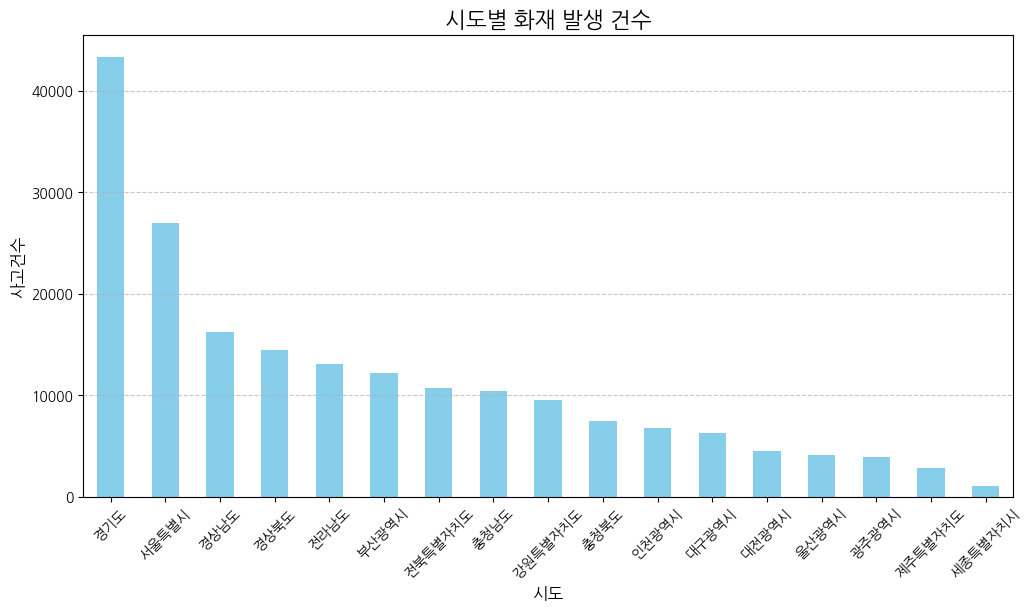

In [16]:
# 데이터 정렬 (오름차순)
region_fire_counts_sorted = region_fire_counts.sort_values(ascending=False)

# 막대 그래프 출력
plt.figure(figsize=(12, 6))
region_fire_counts_sorted.plot(kind='bar', color='skyblue' )
plt.title('시도별 화재 발생 건수', fontsize=16)
plt.xlabel('시도', fontsize=12)
plt.ylabel('사고건수', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

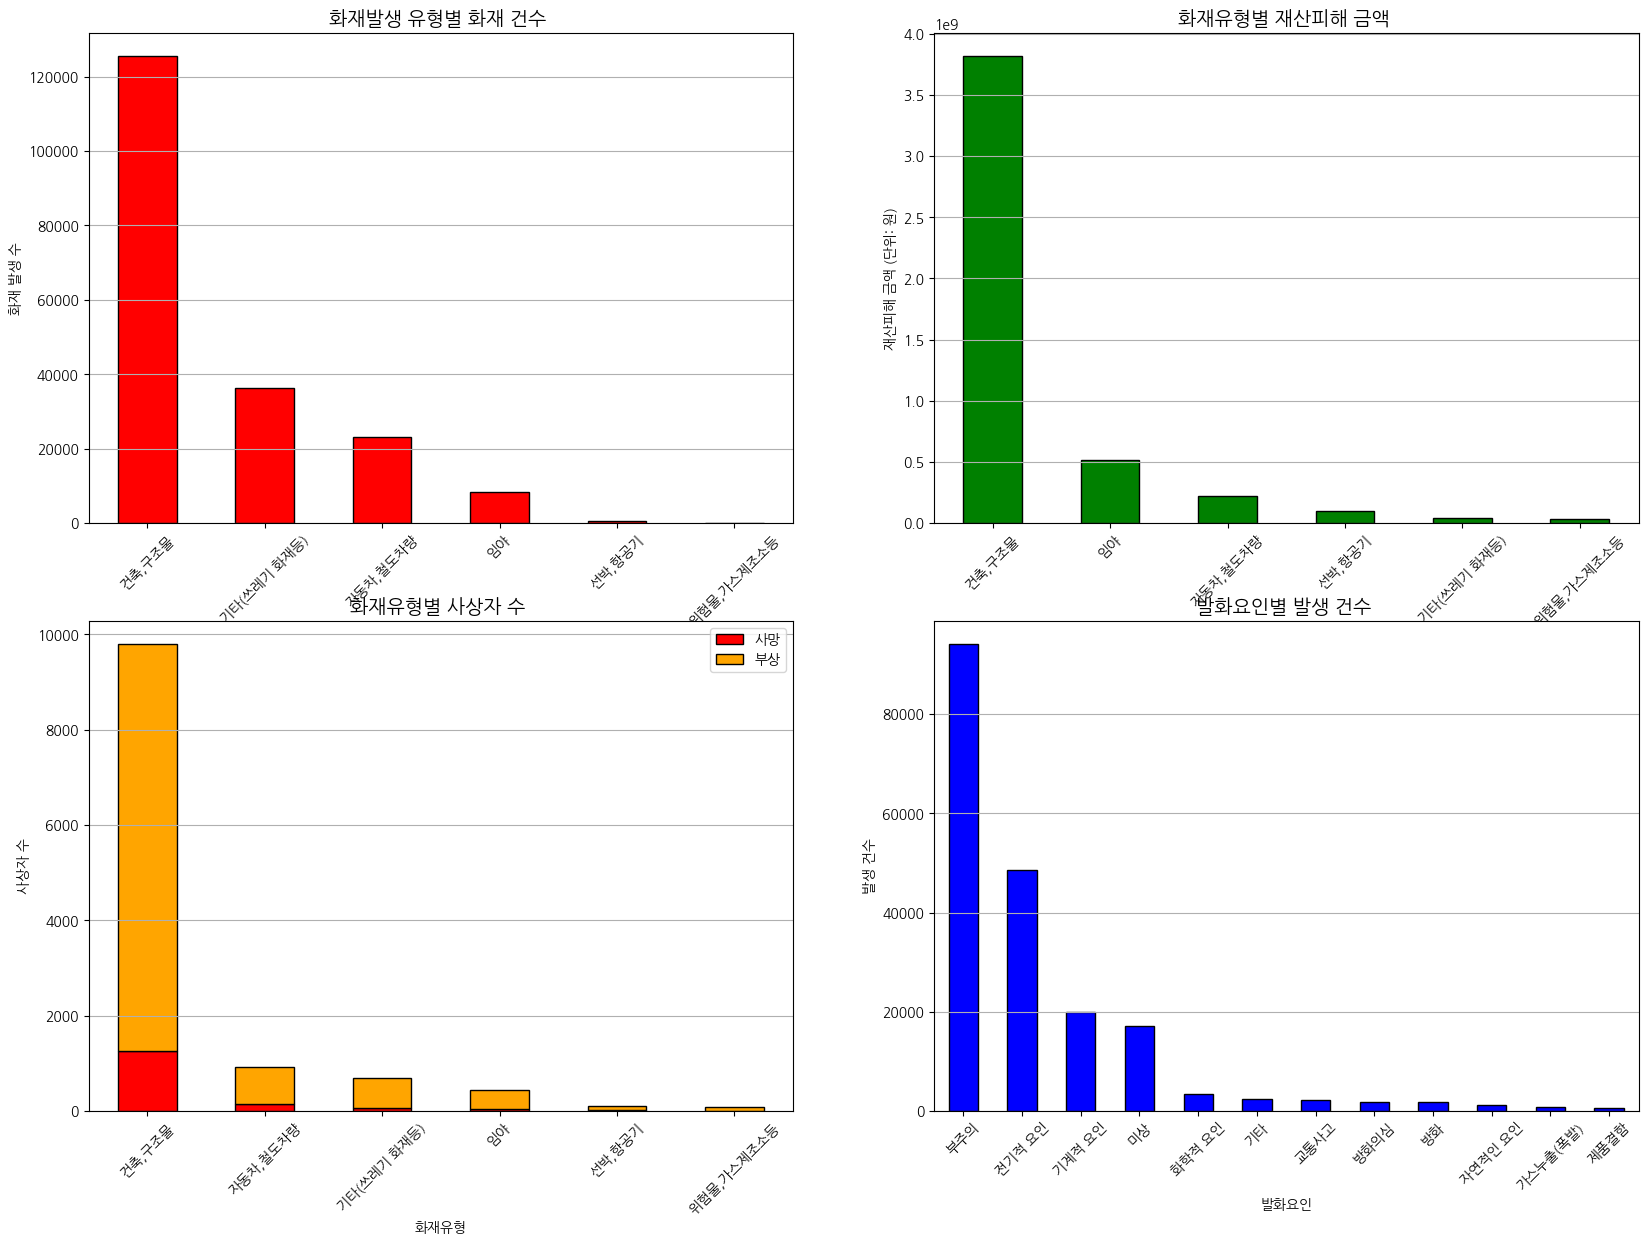

In [17]:
# 데이터 준비 (내림차순 정렬)
fire_type_counts = fire['화재유형'].value_counts().sort_values(ascending=False)  # 화재 건수 내림차순 정렬
fire_property_damage = fire.groupby('화재유형')['재산피해'].sum().sort_values(ascending=False)  # 재산피해 금액 내림차순 정렬
fire_casualties = fire.groupby('화재유형')[['사망', '부상']].sum().sort_values(by='사망', ascending=False)  # 사망 기준 내림차순 정렬
fire_cause_counts = fire['발화요인'].value_counts().sort_values(ascending=False)  # 발화요인 수 내림차순 정렬

# 그래프 크기 설정
fig, axes = plt.subplots(2, 2, figsize=(20, 14))  서브플롯 설정

# 그래프 1: 화재발생 유형별 화재 건수
fire_type_counts.plot(
    kind='bar', color='red', edgecolor='black', ax=axes[0, 0]
)
axes[0, 0].set_title('화재발생 유형별 화재 건수 ', fontsize=14)
axes[0, 0].set_xlabel('화재유형')
axes[0, 0].set_ylabel('화재 발생 수')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y')

# 그래프 2: 재산피해 금액
fire_property_damage.plot(
    kind='bar', color='green', edgecolor='black', ax=axes[0, 1]
)
axes[0, 1].set_title('화재유형별 재산피해 금액 ', fontsize=14)
axes[0, 1].set_xlabel('화재유형')
axes[0, 1].set_ylabel('재산피해 금액 (단위: 원)')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y')

# 그래프 3: 화재유형별 사상자 수 (누적 막대 그래프)
fire_casualties.plot(
    kind='bar', stacked=True, color=['red', 'orange'], edgecolor='black', ax=axes[1, 0]
)
axes[1, 0].set_title('화재유형별 사상자 수 ', fontsize=14)
axes[1, 0].set_xlabel('화재유형')
axes[1, 0].set_ylabel('사상자 수')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y')

# 그래프 4: 발화요인별 발생 건수
fire_cause_counts.plot(
    kind='bar', color='blue', edgecolor='black', ax=axes[1, 1]
)
axes[1, 1].set_title('발화요인별 발생 건수 ', fontsize=14)
axes[1, 1].set_xlabel('발화요인')
axes[1, 1].set_ylabel('발생 건수')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(axis='y')
plt.show()


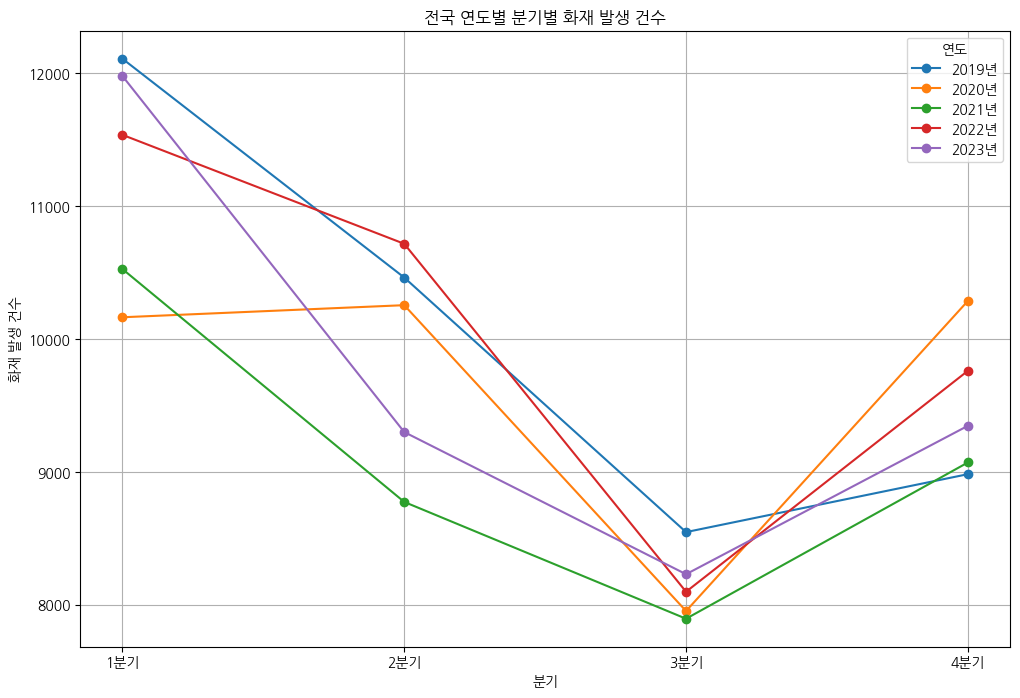

In [24]:
# '화재발생년월일' 열을 datetime 형식으로 변환
fire['화재발생년월일'] = pd.to_datetime(fire['화재발생년월일'], errors='coerce')

# 변환된 데이터만 사용
fire = fire.dropna(subset=['화재발생년월일'])

# 연도와 분기를 추출하여 새로운 열 추가
fire['연도'] = fire['화재발생년월일'].dt.year
fire['분기'] = fire['화재발생년월일'].dt.quarter

# 연도별, 분기별 화재 발생 건수 집계
quarterly_counts = fire.groupby(['연도', '분기']).size().reset_index(name='화재발생건수')

# 그래프 그리기
plt.figure(figsize=(12, 8))

# 연도별로 데이터 필터링 
for year in sorted(quarterly_counts['연도'].unique()):
    yearly_data = quarterly_counts[quarterly_counts['연도'] == year]
    plt.plot(
        yearly_data['분기'], yearly_data['화재발생건수'], 
        marker='o', label=f'{year}년'
    )

# 그래프 
plt.title('전국 연도별 분기별 화재 발생 건수')
plt.xlabel('분기')
plt.ylabel('화재 발생 건수')
plt.xticks([1, 2, 3, 4], ['1분기', '2분기', '3분기', '4분기'])
plt.legend(title='연도')
plt.grid(True)
plt.show()


In [19]:
fire['장소'].value_counts()

장소
주거           52804
기타           36188
산업시설         25837
자동차,철도차량     23190
생활서비스        18781
판매,업무시설      12373
기타서비스         9407
임야            8426
의료,복지시설       1674
교육시설          1613
집합시설          1587
운수자동차시설       1350
선박,항공기         605
위험물,가스제조소      149
문화재시설           15
Name: count, dtype: int64

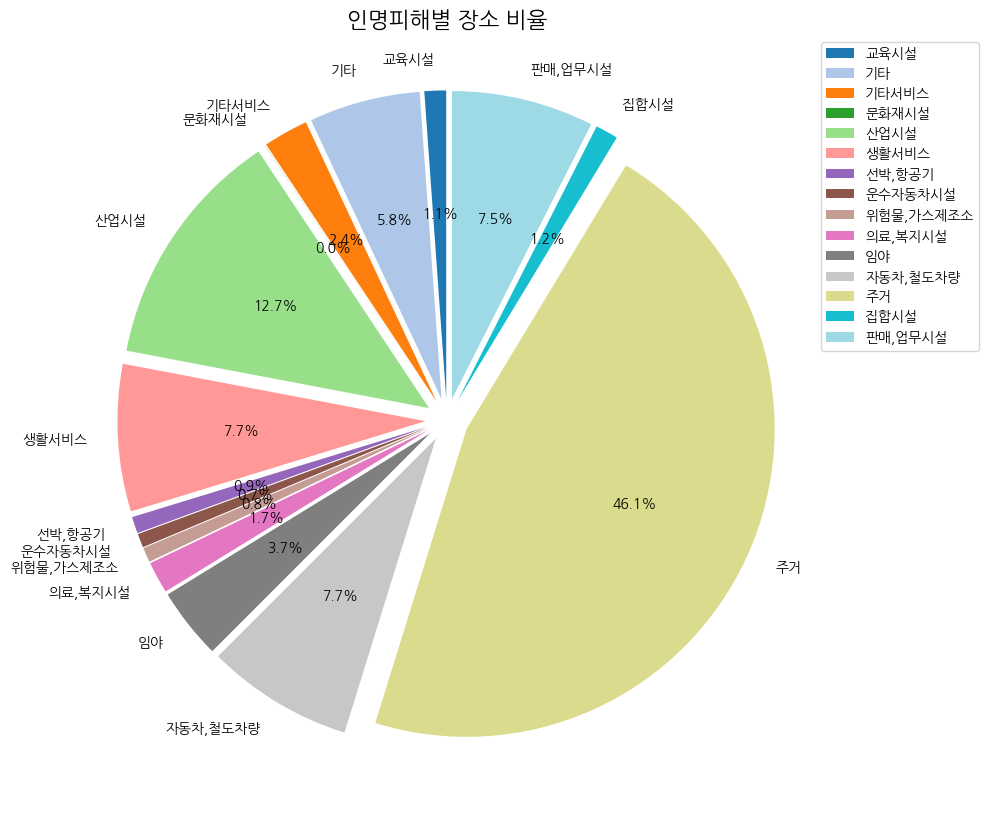

In [22]:

# 인명피해 합계를 기준으로 장소별 비율 계산
place_casualties = fire.groupby('장소')['인명피해'].sum()

# 섹션 간 간격 설정
explode = [0.07] * len(place_casualties)  

# 파이 차트 그리기
plt.figure(figsize=(10, 10))
place_casualties.plot(
    kind='pie',
    autopct='%1.1f%%',  # 퍼센트 표시
    startangle=90,      # 시작 각도
    cmap='tab20',       # 색상 맵 설정
    explode=explode     # 섹션 간 간격 설정
)

# 범례 추가 및 위치 설정
plt.legend(loc='upper right',  bbox_to_anchor=(1.2, 1))  # 우측 상단으로 이동
plt.title('인명피해별 장소 비율', fontsize=16)
plt.ylabel('')  # y축 레이블 제거
plt.show()


In [ ]:
### 